1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


C:\Users\sych_\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


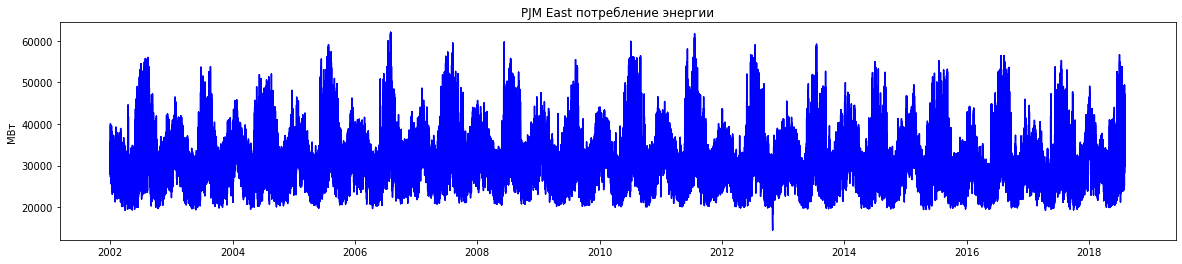

In [3]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [4]:
data_w = data.copy().resample('W').mean()
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


Удалим данные о часах, праздничных днях, днях недели и днях месяца, т.к. они потеряли актуальность. Также удалим поле year, т.к. у нас нет тренда

In [5]:
data_w.drop(data_w.columns[[1,2,3,4,5,7,8,9,10,11]], axis=1,inplace=True)

In [6]:
data_w.head(10)

,PJME_MW,weekofyear
Date,,
2002-01-06,32392.160839,1.0
2002-01-13,31487.386905,2.0
2002-01-20,31452.880952,3.0
2002-01-27,30141.529762,4.0
2002-02-03,29196.488095,5.0
2002-02-10,31150.517857,6.0
2002-02-17,30616.565476,7.0
2002-02-24,29144.130952,8.0
2002-03-03,29869.011905,9.0


In [7]:
len(data_w)

866

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [41]:
model = KMeans(n_clusters=4, random_state=100)
scaler = StandardScaler()

In [42]:
X = data_w.values
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.07794557, -1.67894134],
       [-0.14937974, -1.61235879],
       [-0.15804939, -1.54577624],
       ...,
       [ 0.88695716,  0.18537013],
       [ 1.13060179,  0.25195269],
       [ 1.12733118,  0.31853524]])

In [43]:
train_labels = model.fit_predict(X_scaled)
print(train_labels)

[1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
 3 3 3 3 3 3 3 0 3 3 0 0 0 0 0 0 0 0 0 0 3 3 0 0 1 1 1 1 1 1 1 1 1 2 2 1 2
 2 2 2 2 2 2 2 2 3 2 2 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3
 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3
 3 3 3 3 3 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 1 3 3 

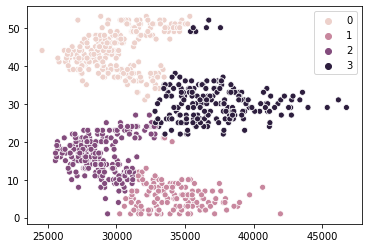

In [44]:
sns.scatterplot(X[:,0],X[:,1], hue=train_labels)
plt.show()

In [45]:
data_w['cluster'] = train_labels
data_w.head(10)

,PJME_MW,weekofyear,cluster
Date,,,
2002-01-06,32392.160839,1.0,1
2002-01-13,31487.386905,2.0,1
2002-01-20,31452.880952,3.0,1
2002-01-27,30141.529762,4.0,2
2002-02-03,29196.488095,5.0,2
2002-02-10,31150.517857,6.0,1
2002-02-17,30616.565476,7.0,2
2002-02-24,29144.130952,8.0,2
2002-03-03,29869.011905,9.0,2


In [48]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff

In [49]:
data_w.head()

,PJME_MW,weekofyear,cluster,diff1
Date,,,,
2002-01-06,32392.160839,1.0,1,0.000000
2002-01-13,31487.386905,2.0,1,-904.773926
2002-01-20,31452.880952,3.0,1,-34.505951
2002-01-27,30141.529762,4.0,2,-1311.351196
2002-02-03,29196.488095,5.0,2,-945.041687


In [79]:
# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

Для временного ряда "Потребление энергии" назначим датой разделения 1/06/2016

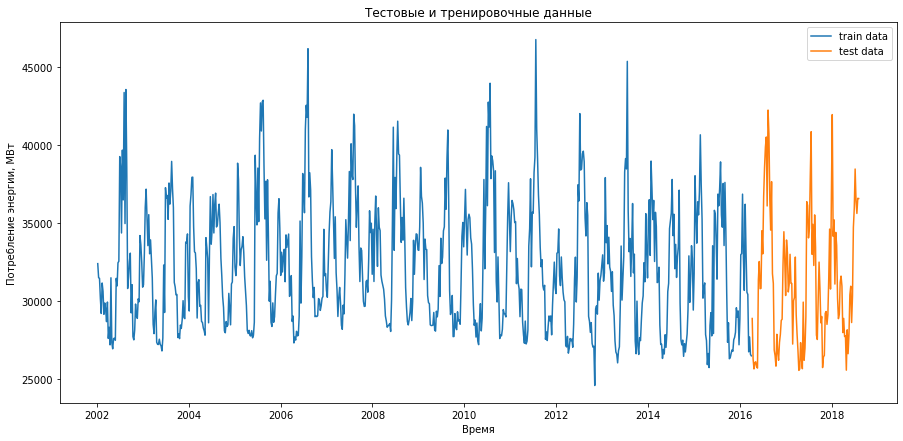

In [80]:
train, test = split_data( data_w, '04-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

2. Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .

In [101]:
# p = 7
h=4
target = data_w['PJME_MW'].values[h:].reshape((data_w.shape[0]-h,1))
#y = scl_target.fit_transform(target)
y = target
X = data_w.values
y.shape

(862, 1)

In [102]:
X_train = X[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [103]:
print(f'X_train_shape={X_train.shape}, y_train_shape={y_train.shape}, X_test_shape={X_test.shape}, y_test_shape={y_test.shape}')

X_train_shape=(744, 4), y_train_shape=(744,), X_test_shape=(122, 4), y_test_shape=(118,)


In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
model_g_h4 = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [107]:
model_g_h4.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [108]:
y_test_pred_g_h4 = model_g_h4.predict(X_test)

Text(0.5, 1.0, 'Модель предсказывания четвертой точки от текущей h=4')

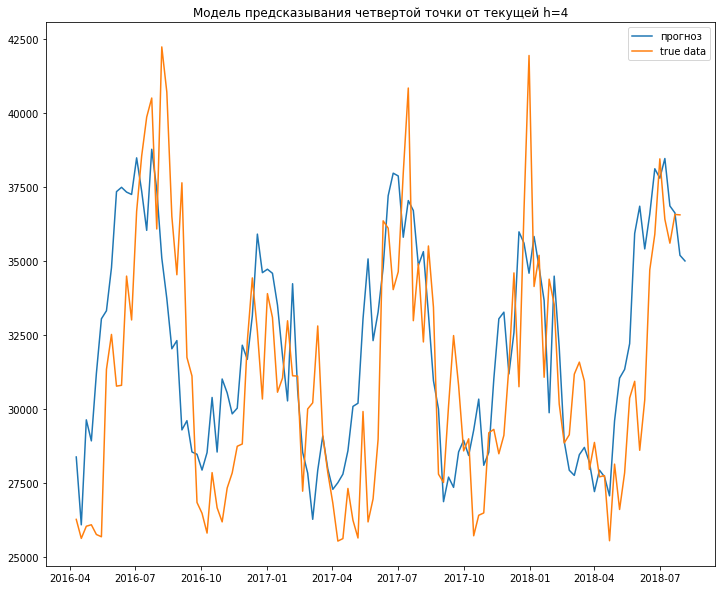

In [131]:
plt.figure(figsize=(12, 10))
plt.plot(test.index, y_test_pred_g_h4, label='прогноз')
plt.plot(test.index[:-1], y_test, label='true data')
plt.legend()
plt.title('Модель предсказывания четвертой точки от текущей h=4')

3. Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 1, тогда target = y(t+h)=y(t+1) 

In [112]:
# p = 7
h=1
target = data_w['PJME_MW'].values[h:].reshape((data_w.shape[0]-h,1))
#y = scl_target.fit_transform(target)
y = target
X = data_w.values
y.shape

(865, 1)

In [113]:
len(data_w)

866

In [114]:
train.shape

(744, 4)

In [115]:
X_train = X[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [116]:
print(f'X_train_shape={X_train.shape}, y_train_shape={y_train.shape}, X_test_shape={X_test.shape}, y_test_shape={y_test.shape}')

X_train_shape=(744, 4), y_train_shape=(744,), X_test_shape=(122, 4), y_test_shape=(121,)


In [117]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [118]:
model_g.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [119]:
y_test_pred_g = model_g.predict(X_test)

In [120]:
y_test_pred_g.shape

(122,)

In [121]:
data_w.index.shape[0]

866

Text(0.5, 1.0, 'Модель предсказывания первой точки от текущей h=1')

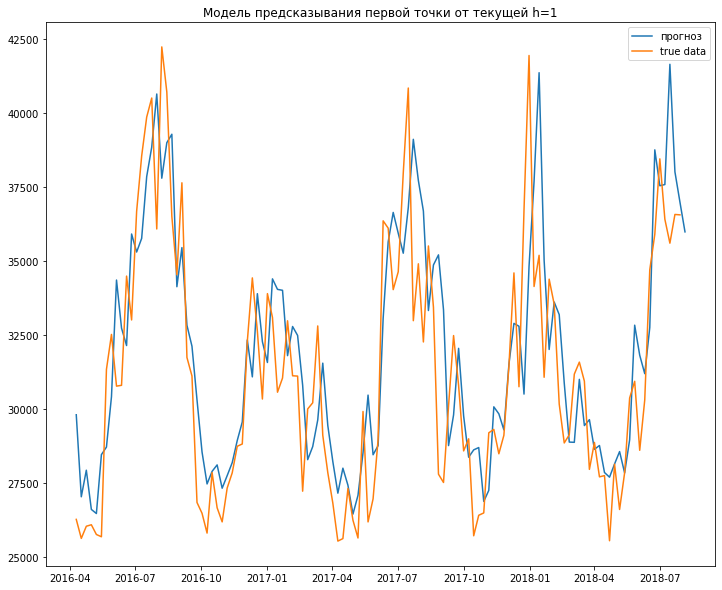

In [128]:
plt.figure(figsize=(12, 10))
plt.plot(test.index, y_test_pred_g, label='прогноз')
plt.plot(test.index[:-1], y_test, label='true data')
plt.legend()
plt.title('Модель предсказывания первой точки от текущей h=1')

In [123]:
X_test.shape

(122, 4)

4. Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.

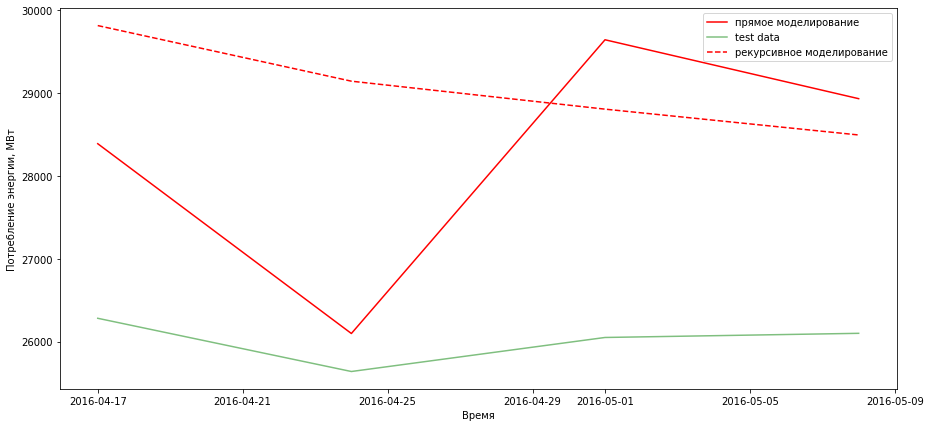

In [135]:

X_test_100 = X_test.copy()
y_test_100 = y_test_pred_g_h4.copy()
N10 = 10
N4 = 4
for i in range(N4):
    y_test_100[i] = model_g.predict(X_test_100[i,:].reshape((1,4)))
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = y_test_100[i]
        
    
    
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N4+1],y_test_pred_g_h4[:N4], 'r',label='прямое моделирование' )
plt.plot(test.index[1:N4+1],y_test[:N4], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N4+1],y_test_100[:N4], '--r',label='рекурсивное моделирование')

plt.legend()
plt.show()   